# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

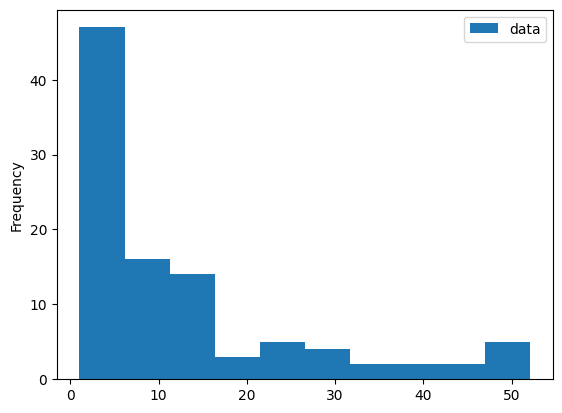

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

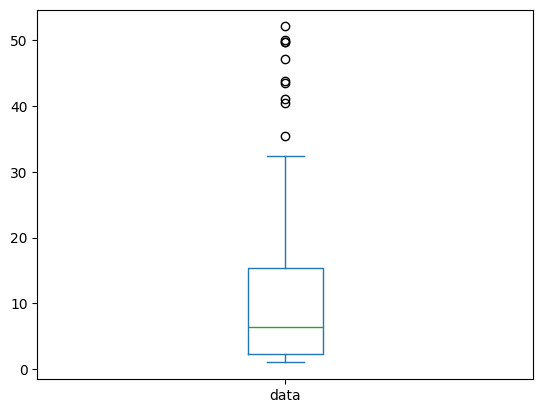

In [3]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

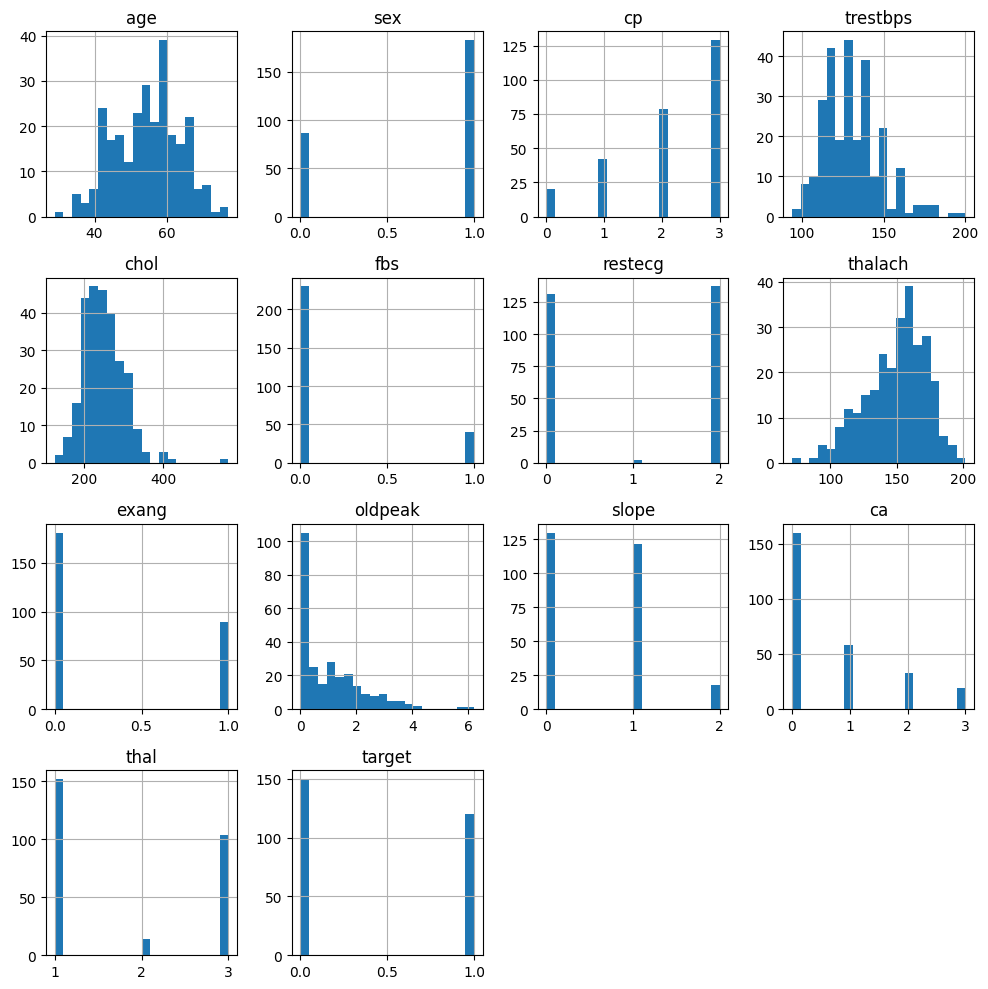

In [11]:
# Load the dataset
df = pd.read_csv("Heart_disease_statlog.csv")

# Draw histograms for each feature
df.hist(bins=20, figsize=(10, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


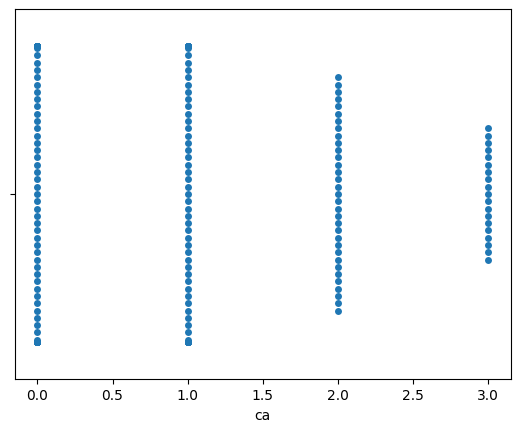

In [ ]:
# Example for Swarm Plot with one feature column name
sns.swarmplot(x='ca', data=df)
plt.show()

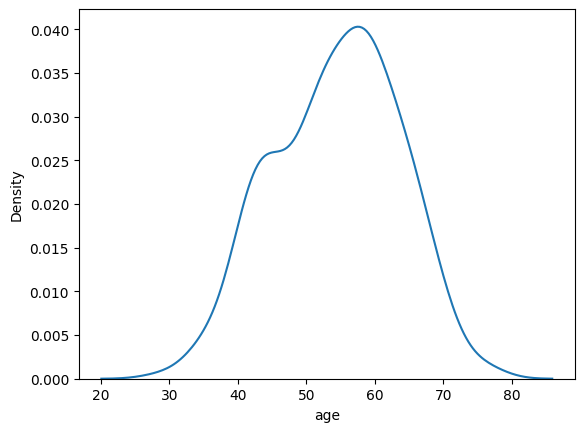

In [13]:
# Example for one feature KDE Plot
sns.kdeplot(df['age'])
plt.show()

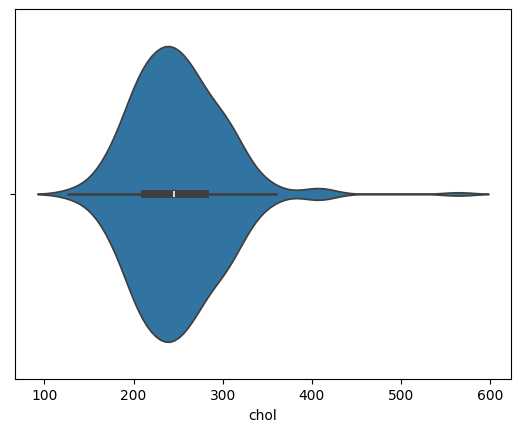

In [14]:
# Example for one feature Violin Plot
sns.violinplot(x='chol', data=df)
plt.show()

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

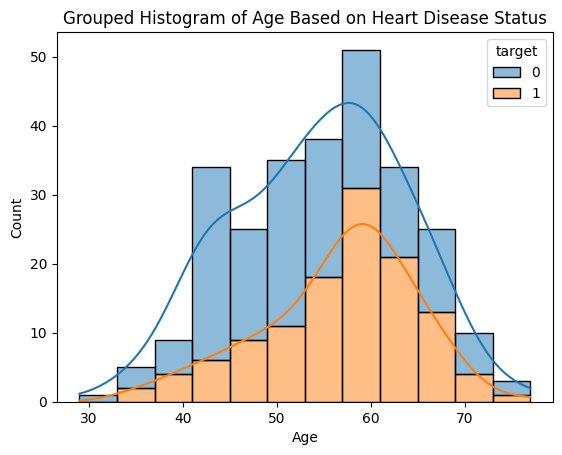

In [15]:
# Create a grouped histogram for the 'age' column, split by 'target'
sns.histplot(data=df, x="age", hue="target", multiple="stack", kde=True)

# Show the plot
plt.title("Grouped Histogram of Age Based on Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

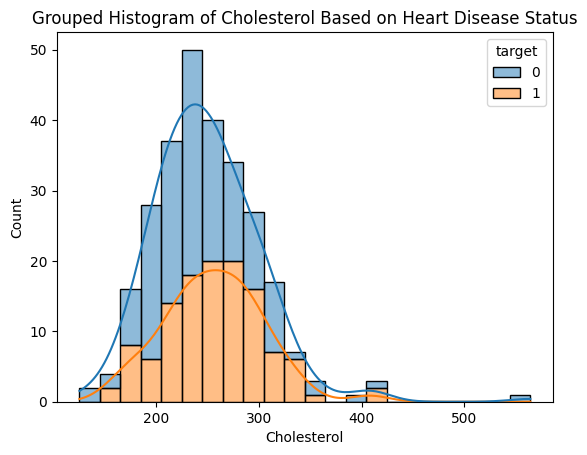

In [16]:
sns.histplot(data=df, x="chol", hue="target", multiple="stack", kde=True)
plt.title("Grouped Histogram of Cholesterol Based on Heart Disease Status")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

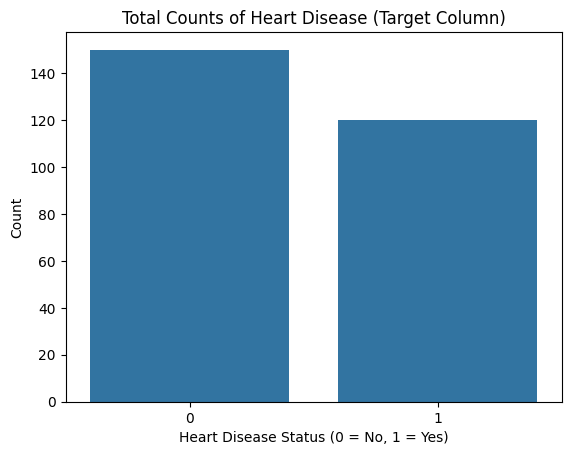

In [17]:
# Create a bar plot for the 'target' column
sns.countplot(x='target', data=df)

# Customize the plot
plt.title('Total Counts of Heart Disease (Target Column)')
plt.xlabel('Heart Disease Status (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Show the plot
plt.show()


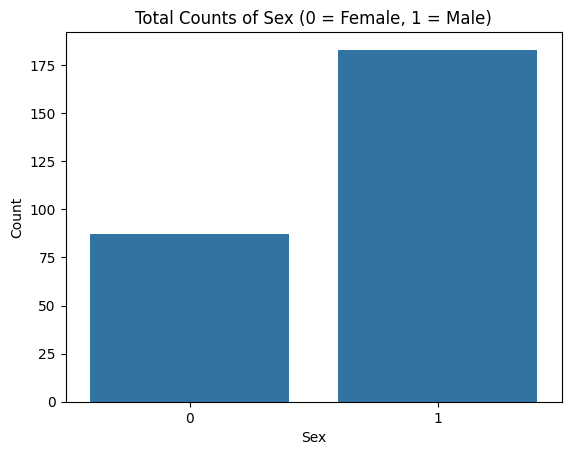

In [18]:
sns.countplot(x='sex', data=df)
plt.title('Total Counts of Sex (0 = Female, 1 = Male)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

- Find means, medians, and modes.

In [19]:
# Calculate mean, median, and mode for each column
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # mode() returns a DataFrame, so we take the first row

# Print the results
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)

Mean values:
 age          54.433333
sex           0.677778
cp            2.174074
trestbps    131.344444
chol        249.659259
fbs           0.148148
restecg       1.022222
thalach     149.677778
exang         0.329630
oldpeak       1.050000
slope         0.585185
ca            0.670370
thal          1.822222
target        0.444444
dtype: float64

Median values:
 age          55.0
sex           1.0
cp            2.0
trestbps    130.0
chol        245.0
fbs           0.0
restecg       2.0
thalach     153.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          1.0
target        0.0
dtype: float64

Mode values:
 age          54.0
sex           1.0
cp            3.0
trestbps    120.0
chol        234.0
fbs           0.0
restecg       2.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          1.0
target        0.0
Name: 0, dtype: float64


Conclusions:

Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

The Statlog Heart Disease dataset provides valuable insights into the risk factors associated with heart disease, containing a mix of numerical and categorical variables that can be analyzed to identify significant predictors. While the data is generally usable, with no missing values and clear feature definitions, the relatively small sample size (270 individuals) could limit the generalizability of the findings and make the data prone to overfitting. Some potential improvements include addressing potential class imbalances, handling outliers, and possibly gathering more diverse or larger datasets for more robust conclusions. Despite these limitations, the dataset is well-suited for initial exploratory analysis and predictive modeling to identify key risk factors for heart disease.

What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

Overall Shape of the Distribution: The distributions of the numerical variables in the dataset, such as age, chol, and trestbps, appear to be skewed rather than normal. Many variables have a right skew, where most values are clustered on the lower end, with a few higher values pulling the distribution toward the right.

- Are there any outliers present?  (Data points that are far from the others.)

Outliers: Yes, there are some outliers present, particularly in variables like chol (cholesterol) and age. These outliers are data points far from the majority and could significantly affect statistical measures like mean and standard deviation.

If there are multiple related histograms, how does the distribution change across different groups?

Distribution Across Groups: When comparing histograms across groups (e.g., people with and without heart disease), the distribution changes. For instance, individuals with heart disease tend to have higher blood pressure and cholesterol, while those without heart disease may have a more evenly distributed range of values.

In [22]:
max_values = df.max()
max_values

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            3.0
thal          3.0
target        1.0
dtype: float64

What are the minimum and maximum values represented in each histogram?

Age (age): Min = 29, Max = 77

Cholesterol (chol): Min = 126 mg/dL, Max = 564 mg/dL

Resting Blood Pressure (trestbps): Min = 94 mmHg, Max = 200 mmHg

How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

Bin Sizes and Histogram Patterns: I used bin size 20 for the first histogram to visualize all of them and tried to use the default for the individual ones which seem to capture what I needed just fine. 

The choice of bin size can affect the appearance of the histogram. Smaller bins provide more detail but can introduce noise, while larger bins can smooth out the data, potentially hiding important patterns or outliers. 

 Does the distribution appear normal, or does it have a different distribution?

 Distribution Type: The distributions do not appear to be normal. They are skewed, with some variables showing clear right skew (such as cholesterol and age), and other variables, like trestbps, showing a more uniform or bimodal pattern depending on the group.

 

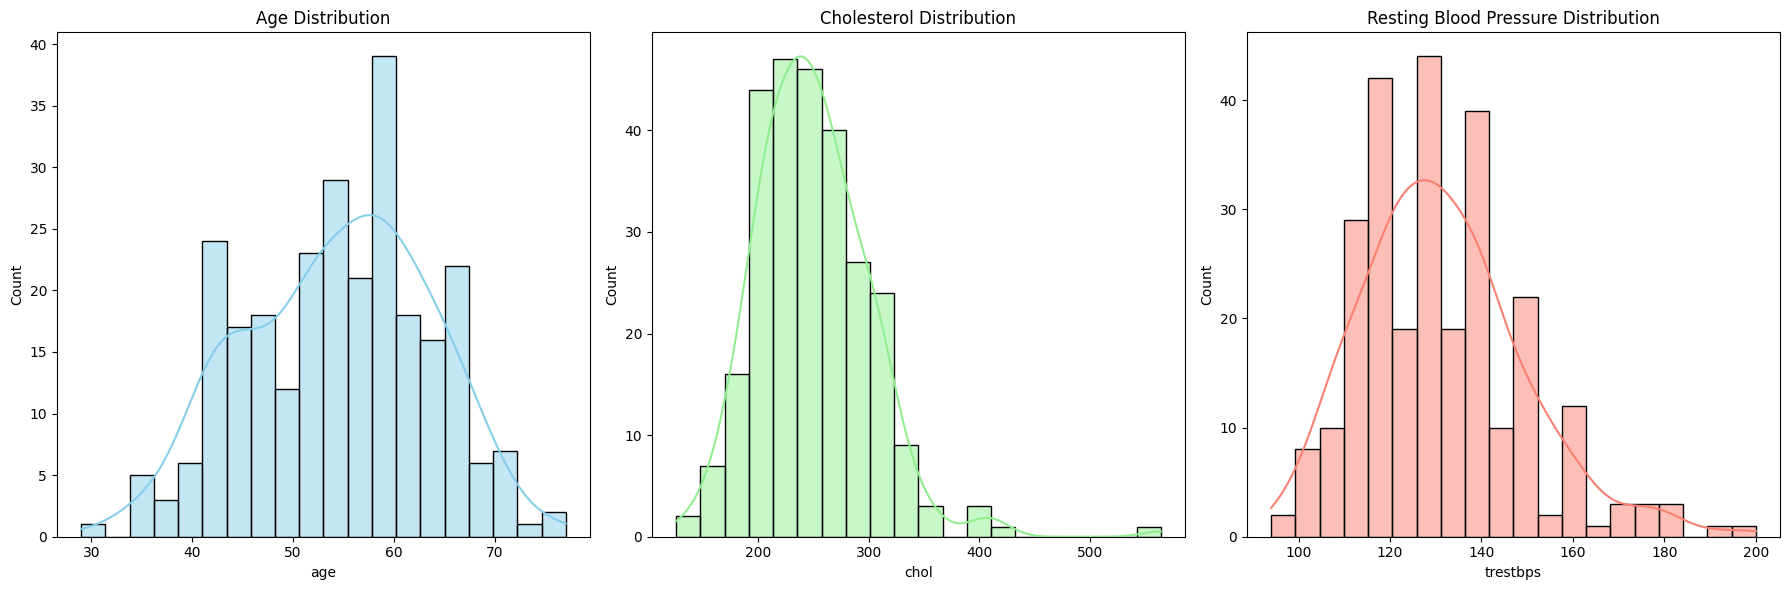

In [23]:
# Set up the figure and axis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram for age
sns.histplot(df['age'], kde=True, bins=20, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

# Plot histogram for cholesterol
sns.histplot(df['chol'], kde=True, bins=20, color='lightgreen', ax=axes[1])
axes[1].set_title('Cholesterol Distribution')

# Plot histogram for resting blood pressure
sns.histplot(df['trestbps'], kde=True, bins=20, color='salmon', ax=axes[2])
axes[2].set_title('Resting Blood Pressure Distribution')

# Show the plot
plt.tight_layout()
plt.show()



# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

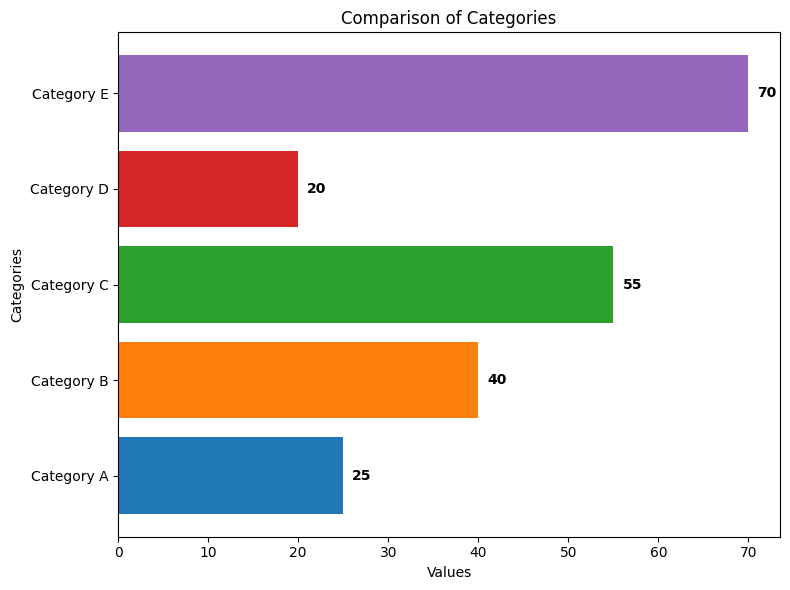

In [25]:
# Example data (categories and values)
categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
values = [25, 40, 55, 20, 70]

# Create horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(categories, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Add annotations
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', color='black', fontweight='bold')

# Title and labels
plt.title('Comparison of Categories')
plt.xlabel('Values')
plt.ylabel('Categories')

# Show the plot
plt.tight_layout()
plt.show()